In [68]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import lightgbm as lgb

In [172]:
def create_data(m, c, target=""):
  data = np.random.multivariate_normal(mean=m, cov=c, size=(500,))
  df = pd.DataFrame({"x": data[:,0], "y": data[:,1]})
  df["z"] = np.random.normal(loc=0, scale=1, size=(500,))
  df["q"] = np.random.normal(loc=1, scale=2, size=(500,))
  df["target"] = target
  return df

df1 = create_data(np.array([3, 1]), np.array([[1, 0.5], [0.5, 1]]), target="red")
df2 = create_data(np.array([1, 3]), np.array([[1, 0.5], [0.5, 1]]), target="blue")

df = pd.concat([df1, df2], axis=0)
df.head()

,x,y,x1,z,q,target
0,3.273893,-1.259047,6.713168,1.182082,1.201371,red
1,2.349213,0.413857,4.774087,0.140203,0.763953,red
2,4.066377,2.255334,8.342461,-1.023122,1.550524,red
3,2.139465,-1.256763,4.476930,1.142138,-1.281316,red
4,3.362079,1.456006,7.004507,0.318296,-1.049080,red


In [173]:
def create_data(m, c, target=""):
  data = np.random.multivariate_normal(mean=m, cov=c, size=(500,))
  df = pd.DataFrame({"x": data[:,0], "y": data[:,1]})
  df["x1"] = df["x"] * 2 + np.random.normal(loc=0.1, scale=0.1, size=(500,))
  df["z"] = np.random.normal(loc=0, scale=1, size=(500,))
  df["q"] = np.random.normal(loc=1, scale=2, size=(500,))
  df["target"] = target
  return df

df1 = create_data(np.array([6, 6]), np.array([[1, 0.5], [0.5, 1]]), target="red")
df2 = create_data(np.array([0, 0]), np.array([[1, 0.5], [0.5, 1]]), target="red")
df3 = create_data(np.array([6, 0]), np.array([[1, 0.5], [0.5, 1]]), target="blue")
df4 = create_data(np.array([0, 6]), np.array([[1, 0.5], [0.5, 1]]), target="blue")

df = pd.concat([df1, df2, df3, df4], axis=0)
df.head()

,x,y,x1,z,q,target
0,4.491982,6.037522,9.058728,0.195406,-1.498461,red
1,4.862250,6.362792,9.797673,1.208438,4.924317,red
2,7.194931,7.639780,14.298755,-0.240612,-1.889199,red
3,6.701094,5.680861,13.569440,-1.421852,1.257974,red
4,6.759706,7.293685,13.614750,0.195701,2.254820,red


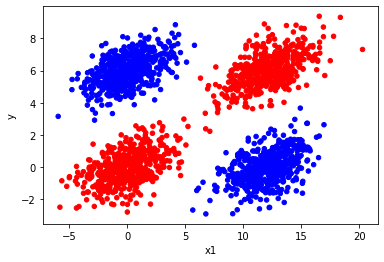

In [177]:
df.plot.scatter(x="x1", y="y", c="target")

In [178]:
train_df, test_df = train_test_split(df, test_size=0.1, random_state=42)

In [179]:
# ロジスティック回帰
def calc_acc(clf, train_data, val_data):
  clf.fit(train_data.drop(columns="target"), train_data.target)
  print(clf.score(val_data.drop(columns="target"), val_data.target))
  return clf

In [188]:
lr = calc_acc(LogisticRegression(), train_df, test_df)
lr.coef_

0.49


In [205]:
dt = calc_acc(DecisionTreeClassifier(), train_df, test_df)
dt.feature_importances_

0.98


array([0.19266015, 0.61554135, 0.15469045, 0.00958396, 0.02752409])

In [206]:
lgbc = calc_acc(lgb.LGBMClassifier(), train_df, test_df)
lgbc.feature_importances_

0.995


array([ 642, 1154,  405,  189,  610])